In [41]:
#The steps to deal with Kmeans clusterring
'''
1. Choose number of clusters you want (K)
2. Specify the cluster seeds (Starting centroid of clusters, they can be assigned or taken at random)
3. Assign each point to a centoid (using eucledian distance)
4. Adjust the seeds to their cluster centroids
5. Repeat the steps 3,4 till final location of cluster centoids equals the cluster seeds
'''


'\n1. Choose number of clusters you want (K)\n2. Specify the cluster seeds (Starting centroid of clusters, they can be assigned or taken at random)\n3. Assign each point to a centoid (using eucledian distance)\n4. Adjust the seeds to their cluster centroids\n5. Repeat the steps 3,4 till final location of cluster centoids equals the cluster seeds\n'

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [43]:
data = pd.read_csv("3.1 Countries_exercise.csv")

In [44]:
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


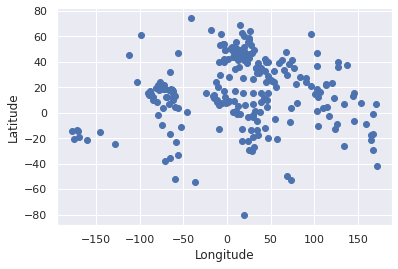

In [45]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [46]:
#Cluster based on location
x=data.iloc[:,1:3]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [47]:
kmeans = KMeans(10)
#2 is number of clusters

In [48]:
kmeans.fit(x)

KMeans(n_clusters=10)

In [49]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 7, 3, 2, 0, 0, 0, 4, 9, 4, 5, 3, 1, 3, 2, 8, 0, 4, 3, 0, 6, 6,
       7, 0, 4, 2, 2, 0, 2, 0, 2, 2, 9, 9, 2, 1, 7, 3, 6, 0, 9, 7, 6, 6,
       3, 6, 5, 2, 3, 6, 2, 2, 2, 2, 4, 4, 0, 0, 4, 2, 0, 2, 6, 2, 4, 4,
       0, 0, 4, 0, 8, 9, 0, 0, 8, 6, 0, 4, 0, 6, 6, 6, 6, 6, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 7, 1, 7, 0, 4, 4, 0, 4, 0, 2, 0, 4,
       1, 7, 7, 3, 7, 1, 2, 2, 1, 0, 4, 1, 4, 6, 0, 2, 0, 7, 3, 0, 0, 0,
       1, 2, 6, 0, 0, 3, 7, 2, 8, 0, 6, 0, 7, 0, 7, 1, 3, 6, 2, 3, 3, 1,
       3, 8, 6, 8, 6, 2, 5, 0, 0, 7, 8, 8, 4, 7, 2, 5, 2, 1, 1, 8, 0, 2,
       1, 0, 9, 4, 5, 4, 0, 7, 3, 6, 4, 4, 4, 6, 1, 9, 6, 8, 6, 2, 0, 4,
       4, 2, 0, 6, 2, 0, 0, 0, 3, 2, 3, 4, 2, 6, 6, 1, 7, 4, 1, 5, 2, 0,
       4, 1, 3, 3, 0, 9, 2, 7, 0, 2, 2, 2, 2, 1, 8, 5, 5, 4, 3, 3, 3],
      dtype=int32)

In [50]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,7
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0


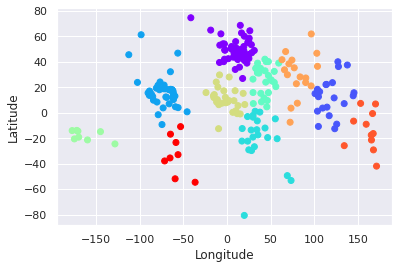

In [51]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap= 'rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [55]:
#How to choose number of clusters?
# By using WCSS (Within Clustter Sum of Squares) and Elbow method we pick the cluster with correcponding low WCSS vlaue
WCSS = []
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)
WCSS

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.086759343,
 192212.4818949704,
 152164.15221066383,
 126758.35414179866,
 102913.99944185292,
 84967.41720068289]

Text(0, 0.5, 'WCSS')

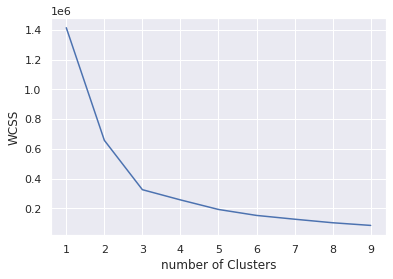

In [56]:
plt.plot(range(1,10), WCSS)
plt.xlabel('number of Clusters')
plt.ylabel('WCSS')
# Which means K=5 is the optimum number of clusters

In [75]:
kmeans = KMeans(5)
kmeans.fit(x)
arr= kmeans.fit_predict(x)

In [76]:
data_with_5clusters = data.copy()
data_with_5clusters['Cluster'] = arr
data_with_5clusters.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


Text(0, 0.5, 'Latitude')

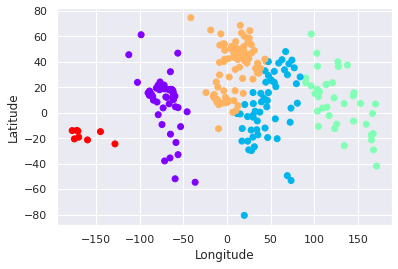

In [77]:
plt.scatter(data_with_5clusters['Longitude'], data_with_5clusters['Latitude'], c= data_with_5clusters['Cluster'], cmap="rainbow")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [79]:
#if we aren't satisfied with the cluster analyze data more deeply and standardize the feature if must
#here in this case as longitude values are more than values of latitudes this model clustered based on longitude values
#hence we try to standardize both latitude and longitude and notice some changes

In [86]:
from sklearn import preprocessing
x_scaled = pd.DataFrame()
x_scaled['Latitude'] = preprocessing.scale(x['Latitude'])
x_scaled['Longitude'] = preprocessing.scale(x['Longitude'])
#so these are the scaled values of latitudes (left) and longitudes (longitudes)

In [87]:
WCSS = []
for i in range(1,10):
  
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  WCSS.append(kmeans.inertia_)
WCSS


[482.0,
 304.0352933576243,
 182.71427961732405,
 140.72852430229966,
 109.20422047607425,
 88.4807500946533,
 71.04887101285348,
 60.86702608309991,
 51.77820270373301]

Text(0, 0.5, 'WCSS')

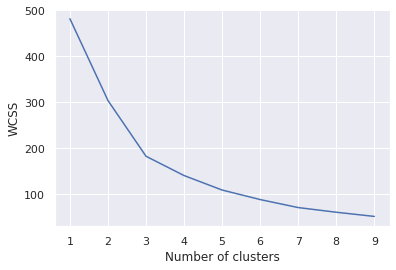

In [88]:
plt.plot(range(1,10), WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [93]:
#plot our cluster with scaled data set
kmeans = KMeans(5)
kmeans.fit(x_scaled)
arr= kmeans.fit_predict(x_scaled)
x_scaled['Cluster'] = arr
x_scaled

,Latitude,Longitude,Cluster
0,-0.175422,-1.171629,0
1,0.628927,0.720657,2
2,-1.111849,0.046226,1
3,0.039797,-1.075368,0
4,0.904683,0.081187,2
...,...,...,...
236,-1.166941,-2.593510,4
237,-0.047553,0.464368,1
238,-1.742328,0.151237,1
239,-1.155809,0.188681,1


Text(0, 0.5, 'Latitude')

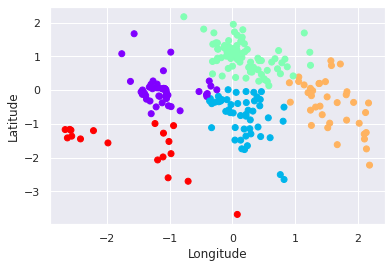

In [96]:
plt.scatter(x_scaled['Longitude'], x_scaled['Latitude'], c= x_scaled['Cluster'], cmap= "rainbow")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#now we can see the difference between plots